In [1]:
import pandas as pd
import IPython.display
import numpy as np
from matplotlib import pyplot as plt

# Reading the data

In [2]:
def print_matrix (mat):
    display(pd.DataFrame(mat, columns=E, index=E).replace(np.nan, 0).replace(0, ""))

In [3]:
X_pandas  = pd.read_excel ("208Tl.xlsx", sheet_name="X", index_col=0).fillna(0).T
G_pandas  = pd.read_excel ("208Tl.xlsx", sheet_name="G", index_col=0).fillna(0).T
Ig_pandas = pd.read_excel ("208Tl.xlsx", sheet_name="I_gamma", index_col=0).fillna(0).T / 100
f_pandas  = pd.read_excel ("208Tl.xlsx", sheet_name="f", index_col=0).sort_index()

X = X_pandas.to_numpy()
G = G_pandas.to_numpy()
E = X_pandas.index.to_numpy()
f = f_pandas["Feeding ratios:"].to_numpy() / 100
n = len(E)

In [4]:
print_matrix(X_pandas)
print_matrix(G_pandas)
display(f_pandas)

,0.000,2614.529,3197.717,3475.088,3708.410,3919.780,3946.420,3960.930,3995.600,4125.280,4180.380,4262.000,4296.280,4323.400,4358.440,4382.900,4480.500
0.000,,1.0,0.000046,0.000065,0.000077,,,0.000472,,,,,,,,,
2614.529,,,0.999954,0.559058,0.016615,,,,1.0,,,1.0,,,0.045455,,
3197.717,,,,0.440876,0.962944,0.394532,1.0,0.583735,,0.714286,0.903084,,,1.0,0.25,1.0,1.0
3475.088,,,,,0.020363,,,0.01543,,0.285714,0.096916,,0.405941,,0.704545,,
3708.410,,,,,,0.605468,,0.400362,,,,,0.594059,,,,
3919.780,,,,,,,,,,,,,,,,,
3946.420,,,,,,,,,,,,,,,,,
3960.930,,,,,,,,,,,,,,,,,
3995.600,,,,,,,,,,,,,,,,,
4125.280,,,,,,,,,,,,,,,,,


,0.000,2614.529,3197.717,3475.088,3708.410,3919.780,3946.420,3960.930,3995.600,4125.280,4180.380,4262.000,4296.280,4323.400,4358.440,4382.900,4480.500
0.000,,0.997536,0.000046,0.000065,0.000077,,,0.000472,,,,,,,,,
2614.529,,,0.979866,0.544679,0.016615,,,,1.0,,,1.0,,,0.045455,,
3197.717,,,,0.28759,0.873261,0.379723,1.0,0.563669,,0.714286,0.903084,,,1.0,0.25,1.0,1.0
3475.088,,,,,0.011978,,,0.01543,,0.285714,0.096916,,0.405941,,0.704545,,
3708.410,,,,,,0.284792,,0.245621,,,,,0.594059,,,,
3919.780,,,,,,,,,,,,,,,,,
3946.420,,,,,,,,,,,,,,,,,
3960.930,,,,,,,,,,,,,,,,,
3995.600,,,,,,,,,,,,,,,,,
4125.280,,,,,,,,,,,,,,,,,


,Feeding ratios:
Energies,
0.000,0.000
2614.529,0.000
3197.717,49.100
3475.088,22.200
3708.410,24.200
3919.780,0.630
3946.420,0.046
3960.930,3.180
3995.600,0.007


# Visualizing $X^k$
because why not

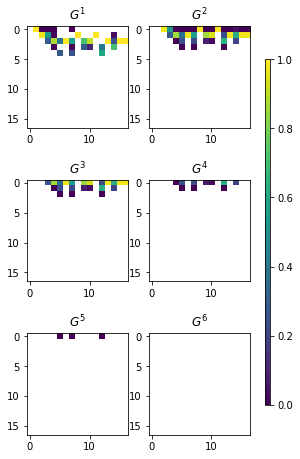

In [43]:
fig, ax = plt.subplots(3, 2, figsize=(4, 8))

for p in range(1, 7):
    G_p = np.linalg.matrix_power(G, p).copy()
    G_p[G_p == 0] = np.nan
    
    x = (p-1) %  2
    y = (p-1) // 2
    ax[y, x].imshow(G_p, vmin=0, vmax=1)
    ax[y, x].set_title("$G^%i$" % p)

ax_cb = fig.add_axes([0.95, 0.2, 0.02, 0.6])
fig.colorbar(ax[0, 0].get_images()[0], cax=ax_cb)

plt.savefig("figures/G_powers.svg")

## Calculating $E_j - E_i$

In [6]:
E_temp = np.repeat(E[np.newaxis, ...], len(E), axis=0)
E_diff = E_temp - E_temp.T
E_diff[E_diff < 0] = 0
print_matrix(E_diff)

,0.000,2614.529,3197.717,3475.088,3708.410,3919.780,3946.420,3960.930,3995.600,4125.280,4180.380,4262.000,4296.280,4323.400,4358.440,4382.900,4480.500
0.000,,2614.529,3197.717,3475.088,3708.41,3919.78,3946.42,3960.93,3995.6,4125.28,4180.38,4262.0,4296.28,4323.4,4358.44,4382.9,4480.5
2614.529,,,583.188,860.559,1093.881,1305.251,1331.891,1346.401,1381.071,1510.751,1565.851,1647.471,1681.751,1708.871,1743.911,1768.371,1865.971
3197.717,,,,277.371,510.693,722.063,748.703,763.213,797.883,927.563,982.663,1064.283,1098.563,1125.683,1160.723,1185.183,1282.783
3475.088,,,,,233.322,444.692,471.332,485.842,520.512,650.192,705.292,786.912,821.192,848.312,883.352,907.812,1005.412
3708.410,,,,,,211.37,238.01,252.52,287.19,416.87,471.97,553.59,587.87,614.99,650.03,674.49,772.09
3919.780,,,,,,,26.64,41.15,75.82,205.5,260.6,342.22,376.5,403.62,438.66,463.12,560.72
3946.420,,,,,,,,14.51,49.18,178.86,233.96,315.58,349.86,376.98,412.02,436.48,534.08
3960.930,,,,,,,,,34.67,164.35,219.45,301.07,335.35,362.47,397.51,421.97,519.57
3995.600,,,,,,,,,,129.68,184.78,266.4,300.68,327.8,362.84,387.3,484.9
4125.280,,,,,,,,,,,55.1,136.72,171.0,198.12,233.16,257.62,355.22


## Efficiencies (at 5cm)

In [7]:
coeffs_photo   = [-0.0493847 ,  0.4605779 , -1.12713897, -1.30844456 ,  7.54867121 , -8.0534457  ]
coeffs_total   = [0.0674584  , -1.00698183,  5.96230285, -17.45501385,  24.94543866, -15.20065626]

mu_photo_curve = lambda E: 10 ** np.poly1d(coeffs_photo)(np.log10(E))
mu_total_curve = lambda E: 10 ** np.poly1d(coeffs_total)(np.log10(E))

mu_photo = np.nan_to_num(mu_photo_curve(E_diff))
mu_total = np.nan_to_num(mu_total_curve(E_diff))

print_matrix(mu_photo)
print_matrix(mu_total)

<ipython-input-7-38779268bc9f>:4: RuntimeWarning: divide by zero encountered in log10
  mu_photo_curve = lambda E: 10 ** np.poly1d(coeffs_photo)(np.log10(E))
/home/balazzs/.local/lib/python3.8/site-packages/numpy/lib/polynomial.py:771: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]
<ipython-input-7-38779268bc9f>:5: RuntimeWarning: divide by zero encountered in log10
  mu_total_curve = lambda E: 10 ** np.poly1d(coeffs_total)(np.log10(E))


,0.000,2614.529,3197.717,3475.088,3708.410,3919.780,3946.420,3960.930,3995.600,4125.280,4180.380,4262.000,4296.280,4323.400,4358.440,4382.900,4480.500
0.000,,0.001897,0.00153,0.001394,0.001293,0.001211,0.001201,0.001196,0.001183,0.001138,0.001119,0.001092,0.001081,0.001073,0.001062,0.001054,0.001025
2614.529,,,0.008455,0.005692,0.004483,0.003769,0.003696,0.003657,0.003567,0.003268,0.003156,0.003004,0.002944,0.002899,0.002842,0.002803,0.00266
3197.717,,,,0.017904,0.009691,0.006797,0.006551,0.006425,0.006143,0.00528,0.004985,0.004606,0.004464,0.004358,0.004229,0.004143,0.003834
3475.088,,,,,0.02105,0.011171,0.010524,0.010201,0.009503,0.007564,0.006961,0.006229,0.005967,0.005775,0.005545,0.005395,0.004873
3708.410,,,,,,0.022992,0.020671,0.019569,0.017314,0.011933,0.010509,0.00892,0.008386,0.008007,0.007566,0.007286,0.00635
3919.780,,,,,,,0.024807,0.036933,0.041476,0.023562,0.018998,0.014569,0.013235,0.012333,0.011328,0.010715,0.008804
3946.420,,,,,,,,0.008265,0.040101,0.026459,0.020998,0.01579,0.01425,0.013218,0.012077,0.011386,0.009255
3960.930,,,,,,,,,0.032697,0.028271,0.022244,0.016537,0.014867,0.013752,0.012526,0.011786,0.009521
3995.600,,,,,,,,,,0.033319,0.025769,0.018607,0.016558,0.015207,0.013738,0.012861,0.010221
4125.280,,,,,,,,,,,0.041342,0.032215,0.027418,0.024313,0.021063,0.019205,0.014035


,0.000,2614.529,3197.717,3475.088,3708.410,3919.780,3946.420,3960.930,3995.600,4125.280,4180.380,4262.000,4296.280,4323.400,4358.440,4382.900,4480.500
0.000,,0.018025,0.017274,0.016983,0.016764,0.016583,0.016562,0.01655,0.016523,0.016423,0.016382,0.016324,0.0163,0.016281,0.016257,0.016241,0.016176
2614.529,,,0.025571,0.023182,0.0219,0.021027,0.020931,0.020879,0.020759,0.020342,0.020179,0.019951,0.019859,0.019789,0.019699,0.019638,0.019405
3197.717,,,,0.031596,0.026495,0.024206,0.023988,0.023874,0.023613,0.022768,0.022458,0.022041,0.021878,0.021755,0.021601,0.021497,0.021111
3475.088,,,,,0.033286,0.027526,0.027084,0.026858,0.026359,0.024858,0.024349,0.023694,0.023447,0.023263,0.023036,0.022886,0.022337
3708.410,,,,,,0.034286,0.033088,0.032503,0.031268,0.028032,0.027074,0.025926,0.025517,0.025218,0.02486,0.024626,0.023805
3919.780,,,,,,,0.025095,0.036727,0.042303,0.034574,0.032195,0.029679,0.028863,0.028291,0.027632,0.027216,0.025838
3946.420,,,,,,,,0.007555,0.039727,0.036005,0.033259,0.030399,0.029487,0.028852,0.028125,0.02767,0.026176
3960.930,,,,,,,,,0.032766,0.036874,0.033904,0.030829,0.029857,0.029183,0.028415,0.027935,0.026372
3995.600,,,,,,,,,,0.039197,0.035669,0.031982,0.030841,0.030058,0.029174,0.028628,0.026873
4125.280,,,,,,,,,,,0.041019,0.038702,0.036467,0.03495,0.033293,0.032307,0.029356


## F, P, N

In [8]:
F = mu_photo * G
P = (mu_total - mu_photo) * G
N = X - F - P

In [9]:
def range_incl(a, b):
    return range(a, b+1)

In [10]:
F_tilde = sum( (np.linalg.matrix_power(F, k) for k in range_incl(1, n-1)) )
N_tilde = sum( (np.linalg.matrix_power(N, k) for k in range_incl(1, n-1)) )

In [11]:
print_matrix(F_tilde)

,0.000,2614.529,3197.717,3475.088,3708.410,3919.780,3946.420,3960.930,3995.600,4125.280,4180.380,4262.000,4296.280,4323.400,4358.440,4382.900,4480.500
0.000,,0.001892,0.000016,0.000006,0.0,0.0,0.0,0.000001,0.000007,0.0,0.0,0.000006,0.0,0.0,0.0,0.0,0.0
2614.529,,,0.008285,0.003143,0.000145,0.000022,0.000054,0.000031,0.003567,0.000038,0.000039,0.003004,0.000008,0.000036,0.00015,0.000034,0.000032
3197.717,,,,0.005149,0.008464,0.002636,0.006551,0.003663,,0.003783,0.004506,,0.000055,0.004358,0.001077,0.004143,0.003834
3475.088,,,,,0.000252,0.000002,,0.000159,,0.002161,0.000675,,0.002423,,0.003907,,
3708.410,,,,,,0.006548,,0.004806,,,,,0.004982,,,,
3919.780,,,,,,,,,,,,,,,,,
3946.420,,,,,,,,,,,,,,,,,
3960.930,,,,,,,,,,,,,,,,,
3995.600,,,,,,,,,,,,,,,,,
4125.280,,,,,,,,,,,,,,,,,


In [12]:
print_matrix(N_tilde)

,0.000,2614.529,3197.717,3475.088,3708.410,3919.780,3946.420,3960.930,3995.600,4125.280,4180.380,4262.000,4296.280,4323.400,4358.440,4382.900,4480.500
0.000,,0.982019,0.957413,0.950072,0.934787,0.925786,0.934447,0.927513,0.961633,0.932998,0.935042,0.962427,0.917778,0.936585,0.93189,0.936832,0.937202
2614.529,,,0.974897,0.967382,0.95178,0.942646,0.951512,0.943947,0.979241,0.950025,0.952114,0.980049,0.934478,0.953689,0.948883,0.95394,0.954317
3197.717,,,,0.431789,0.948428,0.950322,0.976012,0.948905,,0.818325,0.923631,,0.720216,0.978245,0.541807,0.978503,0.978889
3475.088,,,,,0.019964,0.011893,,0.022849,,0.278612,0.094556,,0.40798,,0.688315,,
3708.410,,,,,,0.595704,,0.392379,,,,,0.578901,,,,
3919.780,,,,,,,,,,,,,,,,,
3946.420,,,,,,,,,,,,,,,,,
3960.930,,,,,,,,,,,,,,,,,
3995.600,,,,,,,,,,,,,,,,,
4125.280,,,,,,,,,,,,,,,,,


## O matrices and P

In [41]:
O = [np.zeros(X.shape), np.zeros(X.shape), np.zeros(X.shape)]

#note that python goes from 0 to n-1 not 1 to n
for i in range(n):
    for j in range(n):
        f_higher = f.copy()
        f_higher[:j+1] = 0
        
        O[0][i,j] = f[j] + np.dot(N_tilde[j, :], f_higher)
        O[1][i,j] = F_tilde[i, j]
        O[2][i,j] = 1 if i==0 else N_tilde[0, i]

P = O[0] * O[1] * O[2]

In [42]:
print_matrix(P)

,0.000,2614.529,3197.717,3475.088,3708.410,3919.780,3946.420,3960.930,3995.600,4125.280,4180.380,4262.000,4296.280,4323.400,4358.440,4382.900,4480.500
0.000,,0.001828,0.000014,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2614.529,,,0.006983,0.000707,0.000037,0.0,0.0,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3197.717,,,,0.001129,0.002097,0.000016,0.000003,0.000112,,0.000006,0.00001,,0.0,0.0,0.0,0.000001,0.000002
3475.088,,,,,0.000062,0.0,,0.000005,,0.000004,0.000001,,0.000002,,0.000002,,
3708.410,,,,,,0.000039,,0.000143,,,,,0.000005,,,,
3919.780,,,,,,,,,,,,,,,,,
3946.420,,,,,,,,,,,,,,,,,
3960.930,,,,,,,,,,,,,,,,,
3995.600,,,,,,,,,,,,,,,,,
4125.280,,,,,,,,,,,,,,,,,


# Comparison

## Calculating $\varepsilon_{ij}$

In [15]:
V = sum( (np.linalg.matrix_power(X, k) for k in range(1, n)) )

q = np.zeros(n)

for j in range(n):
    f_higher = f.copy()
    f_higher[:j+1] = 0

    q[j] = f[j] + np.dot(V[j, :], f_higher)
q

array([9.99860000e-01, 9.99769848e-01, 8.67253717e-01, 2.29207716e-01,
       2.59145968e-01, 6.30000000e-03, 4.60000000e-04, 3.18000000e-02,
       7.00000000e-05, 1.75000000e-03, 2.27000000e-03, 2.00000000e-05,
       1.01000000e-03, 5.00000000e-05, 4.40000000e-04, 1.70000000e-04,
       5.20000000e-04])

In [16]:
f.sum()

0.99986

Seems to alright, $q_1 = \sum f_i$

In [17]:
eps = G * q
print_matrix(eps)

,0.000,2614.529,3197.717,3475.088,3708.410,3919.780,3946.420,3960.930,3995.600,4125.280,4180.380,4262.000,4296.280,4323.400,4358.440,4382.900,4480.500
0.000,,0.997307,0.00004,0.000015,0.00002,,,0.000015,,,,,,,,,
2614.529,,,0.849793,0.124845,0.004306,,,,0.00007,,,0.00002,,,0.00002,,
3197.717,,,,0.065918,0.226302,0.002392,0.00046,0.017925,,0.00125,0.00205,,,0.00005,0.00011,0.00017,0.00052
3475.088,,,,,0.003104,,,0.000491,,0.0005,0.00022,,0.00041,,0.00031,,
3708.410,,,,,,0.001794,,0.007811,,,,,0.0006,,,,
3919.780,,,,,,,,,,,,,,,,,
3946.420,,,,,,,,,,,,,,,,,
3960.930,,,,,,,,,,,,,,,,,
3995.600,,,,,,,,,,,,,,,,,
4125.280,,,,,,,,,,,,,,,,,


This is supposed to be the same as $I_{\gamma}$, lets check

In [18]:
print_matrix(Ig_pandas)

,0.000,2614.529,3197.717,3475.088,3708.410,3919.780,3946.420,3960.930,3995.600,4125.280,4180.380,4262.000,4296.280,4323.400,4358.440,4382.900,4480.500
0.000,,0.99754,0.00004,0.000015,0.00002,,,0.000015,,,,,,,,,
2614.529,,,0.85,0.125,0.0043,,,,0.00007,,,0.00002,,,0.00002,,
3197.717,,,,0.066,0.226,0.0024,0.00046,0.0179,,0.00125,0.00205,,,0.00005,0.00011,0.00017,0.00052
3475.088,,,,,0.0031,,,0.00049,,0.0005,0.00022,,0.00041,,0.00031,,
3708.410,,,,,,0.0018,,0.0078,,,,,0.0006,,,,
3919.780,,,,,,,,,,,,,,,,,
3946.420,,,,,,,,,,,,,,,,,
3960.930,,,,,,,,,,,,,,,,,
3995.600,,,,,,,,,,,,,,,,,
4125.280,,,,,,,,,,,,,,,,,


In [19]:
print_matrix(np.log10(np.abs(1 - Ig_pandas / eps)))

,0.000,2614.529,3197.717,3475.088,3708.410,3919.780,3946.420,3960.930,3995.600,4125.280,4180.380,4262.000,4296.280,4323.400,4358.440,4382.900,4480.500
0.000,,-3.630543,-3.613007,-2.904952,-2.874759,,,-2.86135,,,,,,,,,
2614.529,,,-3.613007,-2.904952,-2.874759,,,,-inf,,,-inf,,,-15.65356,,
3197.717,,,,-2.904952,-2.874759,-2.48971,-inf,-2.86135,,-15.65356,-inf,,,-inf,-inf,-inf,-inf
3475.088,,,,,-2.874759,,,-2.86135,,-inf,-15.95459,,-inf,,-inf,,
3708.410,,,,,,-2.48971,,-2.86135,,,,,-inf,,,,
3919.780,,,,,,,,,,,,,,,,,
3946.420,,,,,,,,,,,,,,,,,
3960.930,,,,,,,,,,,,,,,,,
3995.600,,,,,,,,,,,,,,,,,
4125.280,,,,,,,,,,,,,,,,,


The relative difference is in $10^{-3}$ order at some places, meaning 0.1-0.2% difference at most.


## Comparing P vs uncorrected P

In [20]:
P_ = eps * mu_photo

In [21]:
P_list  = np.ravel(P)
P2_list = np.ravel(P_)

(1e-06, 0.019377031639422435)

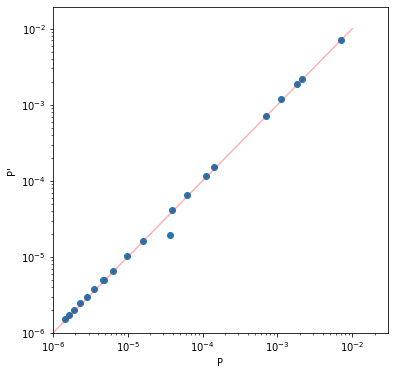

In [22]:
plt.figure(figsize=(6,6))
plt.scatter(P_list, P2_list)
plt.xlabel("P")
plt.ylabel("P'")
plt.plot([0,1e-2], [0, 1e-2], alpha=0.3, color="red")

plt.xscale("log")
plt.yscale("log")

plt.xlim(1e-6)
plt.ylim(1e-6)

Not much is visible :(

In [33]:
diff  = P - P_
ratio = np.nan_to_num(P / P_, posinf=np.inf, neginf=0)
np.unravel_index(np.argmax(ratio), P.shape)

<ipython-input-33-4e594c783d50>:2: RuntimeWarning: divide by zero encountered in true_divide
  ratio = np.nan_to_num(P / P_, posinf=np.inf, neginf=0)
<ipython-input-33-4e594c783d50>:2: RuntimeWarning: invalid value encountered in true_divide
  ratio = np.nan_to_num(P / P_, posinf=np.inf, neginf=0)


(0, 5)

In [34]:
print_matrix(ratio)

,0.000,2614.529,3197.717,3475.088,3708.410,3919.780,3946.420,3960.930,3995.600,4125.280,4180.380,4262.000,4296.280,4323.400,4358.440,4382.900,4480.500
0.000,,0.96636,220.820266,66.219662,3.753888,inf,inf,1.105858,inf,inf,inf,inf,inf,inf,inf,inf,inf
2614.529,,,0.971775,0.994847,1.914452,inf,inf,inf,0.982019,inf,inf,0.982019,inf,inf,1.141956,inf,inf
3197.717,,,,0.956755,0.956338,0.977973,0.957413,0.968383,,0.960238,0.958152,,inf,0.957413,0.975631,0.957413,0.957413
3475.088,,,,,0.948859,inf,,0.957387,,0.950072,0.950072,,0.950564,,0.950072,,
3708.410,,,,,,0.934787,,0.934787,,,,,0.934787,,,,
3919.780,,,,,,,,,,,,,,,,,
3946.420,,,,,,,,,,,,,,,,,
3960.930,,,,,,,,,,,,,,,,,
3995.600,,,,,,,,,,,,,,,,,
4125.280,,,,,,,,,,,,,,,,,


$3197.717 \rightarrow 0$ is 220 times more likely to be measured, because it's only $I_\gamma = 0.004$ but the 2 step $I_\gamma$s are $0.85$ and $0.99754$. Still not 85/0.4, because of the efficiency difference

In [35]:
e = E_diff[ratio != 0]
r = ratio [ratio != 0]

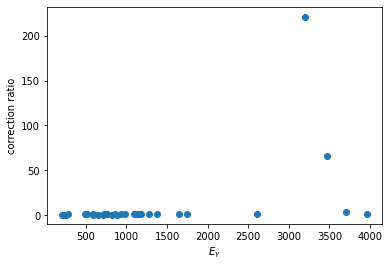

In [36]:
plt.scatter(e, r)
plt.xlabel("$E_\gamma$")
plt.ylabel("correction ratio");

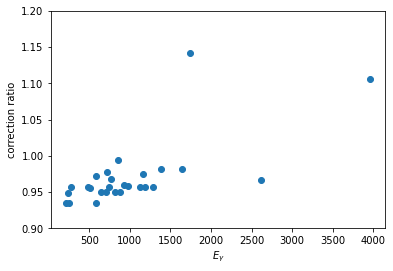

In [37]:
plt.scatter(E_diff[ratio != 0], ratio [ratio != 0])
plt.ylim(0.9, 1.2)
plt.xlabel("$E_\gamma$")
plt.ylabel("correction ratio");

In [38]:
pd.DataFrame(r, index=pd.Index(e, name="$E_\gamma$"), columns=["corr"]).sort_index()

,corr
$E_\gamma$,
211.370,0.934787
233.322,0.948859
252.520,0.934787
277.371,0.956755
444.692,inf
485.842,0.957387
510.693,0.956338
583.188,0.971775
587.870,0.934787


In [39]:
print_matrix(O[0])

,0.000,2614.529,3197.717,3475.088,3708.410,3919.780,3946.420,3960.930,3995.600,4125.280,4180.380,4262.000,4296.280,4323.400,4358.440,4382.900,4480.500
0.000,0.948854,0.966138,0.858207,0.22905,0.258815,0.0063,0.00046,0.0318,0.00007,0.00175,0.00227,0.00002,0.00101,0.00005,0.00044,0.00017,0.00052
2614.529,0.948854,0.966138,0.858207,0.22905,0.258815,0.0063,0.00046,0.0318,0.00007,0.00175,0.00227,0.00002,0.00101,0.00005,0.00044,0.00017,0.00052
3197.717,0.948854,0.966138,0.858207,0.22905,0.258815,0.0063,0.00046,0.0318,0.00007,0.00175,0.00227,0.00002,0.00101,0.00005,0.00044,0.00017,0.00052
3475.088,0.948854,0.966138,0.858207,0.22905,0.258815,0.0063,0.00046,0.0318,0.00007,0.00175,0.00227,0.00002,0.00101,0.00005,0.00044,0.00017,0.00052
3708.410,0.948854,0.966138,0.858207,0.22905,0.258815,0.0063,0.00046,0.0318,0.00007,0.00175,0.00227,0.00002,0.00101,0.00005,0.00044,0.00017,0.00052
3919.780,0.948854,0.966138,0.858207,0.22905,0.258815,0.0063,0.00046,0.0318,0.00007,0.00175,0.00227,0.00002,0.00101,0.00005,0.00044,0.00017,0.00052
3946.420,0.948854,0.966138,0.858207,0.22905,0.258815,0.0063,0.00046,0.0318,0.00007,0.00175,0.00227,0.00002,0.00101,0.00005,0.00044,0.00017,0.00052
3960.930,0.948854,0.966138,0.858207,0.22905,0.258815,0.0063,0.00046,0.0318,0.00007,0.00175,0.00227,0.00002,0.00101,0.00005,0.00044,0.00017,0.00052
3995.600,0.948854,0.966138,0.858207,0.22905,0.258815,0.0063,0.00046,0.0318,0.00007,0.00175,0.00227,0.00002,0.00101,0.00005,0.00044,0.00017,0.00052
4125.280,0.948854,0.966138,0.858207,0.22905,0.258815,0.0063,0.00046,0.0318,0.00007,0.00175,0.00227,0.00002,0.00101,0.00005,0.00044,0.00017,0.00052


In [40]:
print_matrix(O[1])

,0.000,2614.529,3197.717,3475.088,3708.410,3919.780,3946.420,3960.930,3995.600,4125.280,4180.380,4262.000,4296.280,4323.400,4358.440,4382.900,4480.500
0.000,,0.001892,0.000016,0.000006,0.0,0.0,0.0,0.000001,0.000007,0.0,0.0,0.000006,0.0,0.0,0.0,0.0,0.0
2614.529,,,0.008285,0.003143,0.000145,0.000022,0.000054,0.000031,0.003567,0.000038,0.000039,0.003004,0.000008,0.000036,0.00015,0.000034,0.000032
3197.717,,,,0.005149,0.008464,0.002636,0.006551,0.003663,,0.003783,0.004506,,0.000055,0.004358,0.001077,0.004143,0.003834
3475.088,,,,,0.000252,0.000002,,0.000159,,0.002161,0.000675,,0.002423,,0.003907,,
3708.410,,,,,,0.006548,,0.004806,,,,,0.004982,,,,
3919.780,,,,,,,,,,,,,,,,,
3946.420,,,,,,,,,,,,,,,,,
3960.930,,,,,,,,,,,,,,,,,
3995.600,,,,,,,,,,,,,,,,,
4125.280,,,,,,,,,,,,,,,,,
